<a href="https://colab.research.google.com/github/Tejasri-123/Crop_Recommendation/blob/main/CropRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing all necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.metrics import classification_report
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### **Load DataSet**

In [2]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


### **About the dataset**









*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm














In [5]:
df.size

17600

In [6]:
df.shape

(2200, 8)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [11]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

### **Checking for null values**

In [13]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

##### As we observe there are no null values in this dataset

### **EDA**

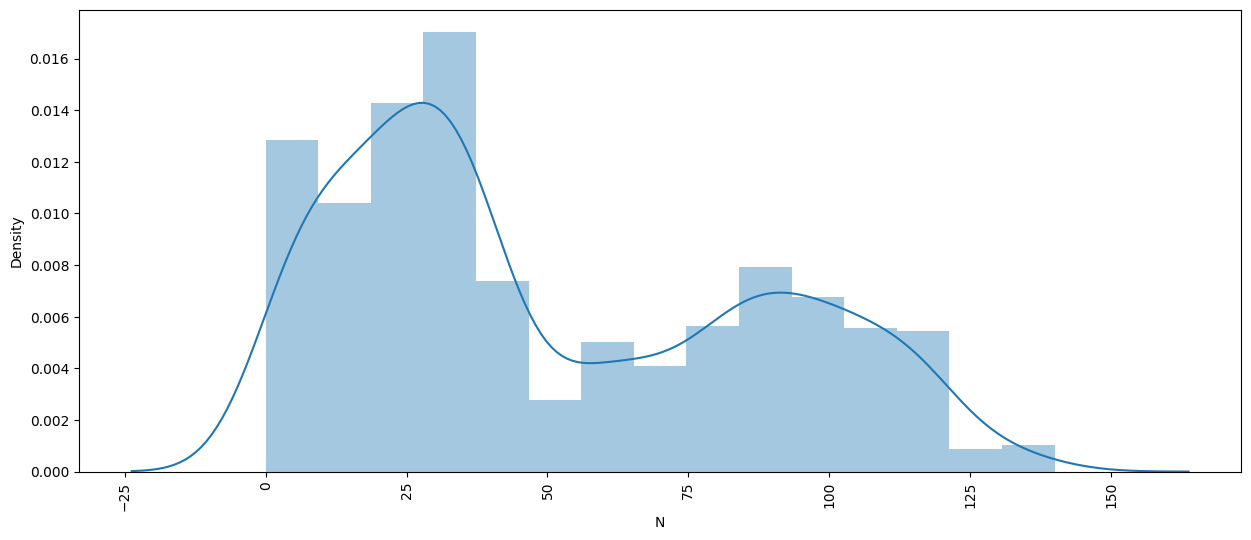

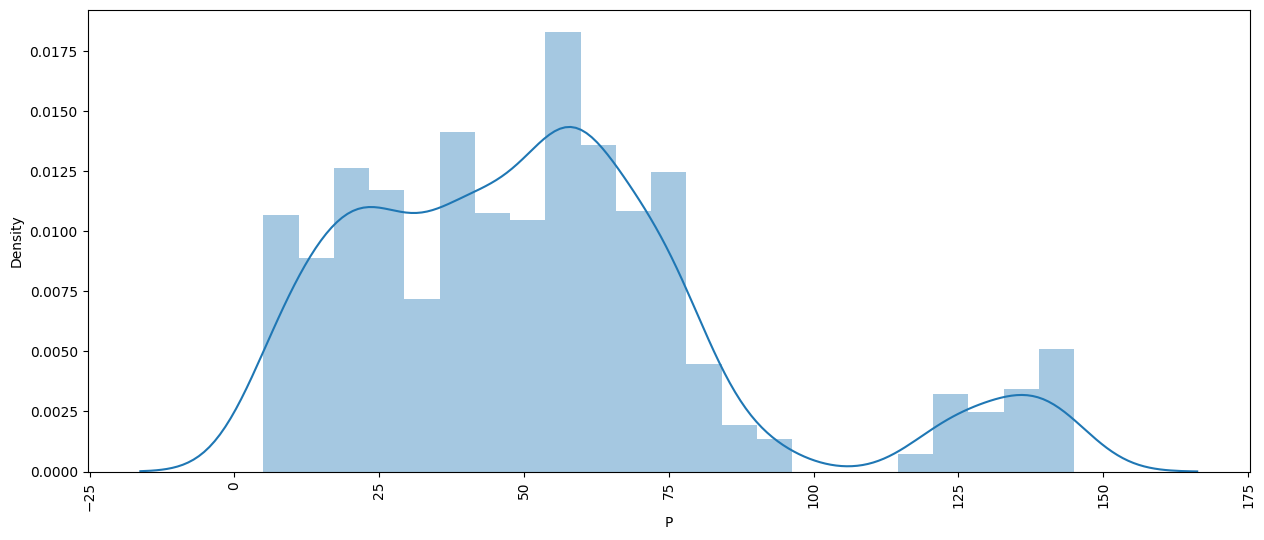

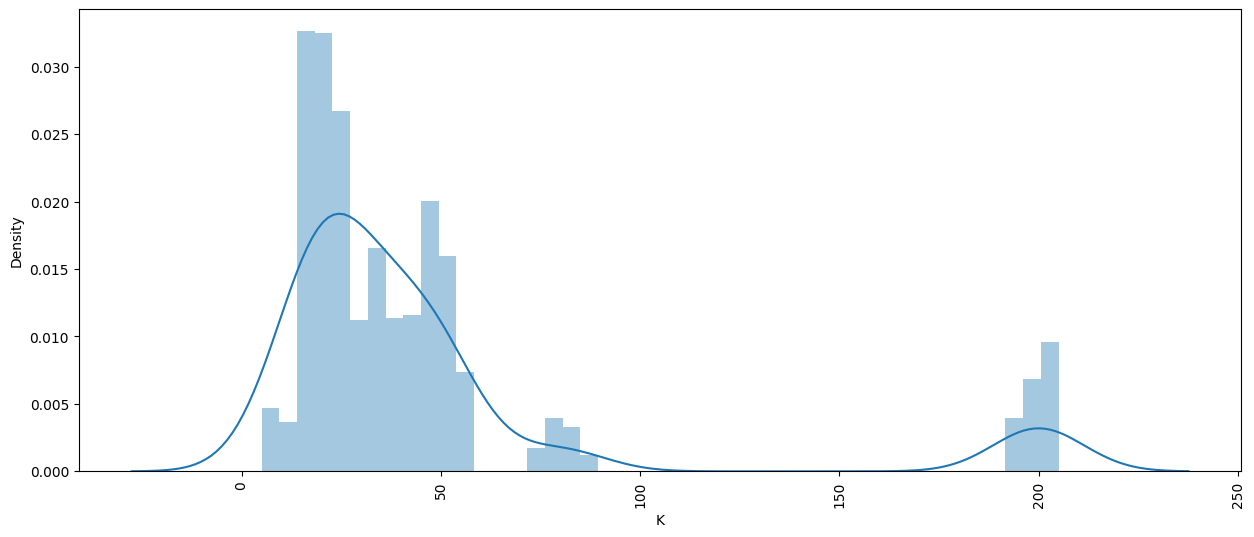

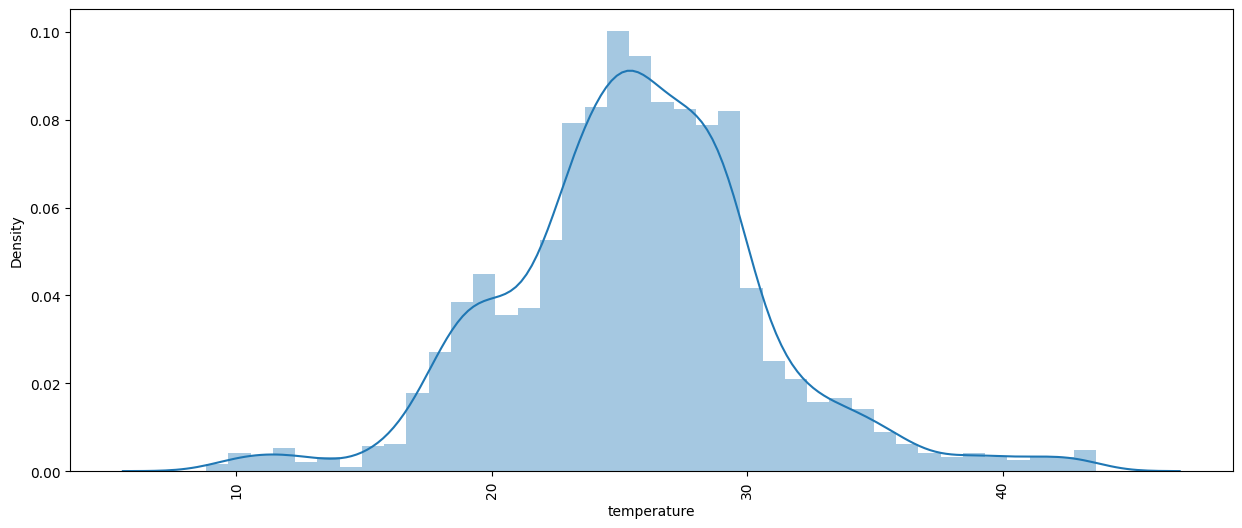

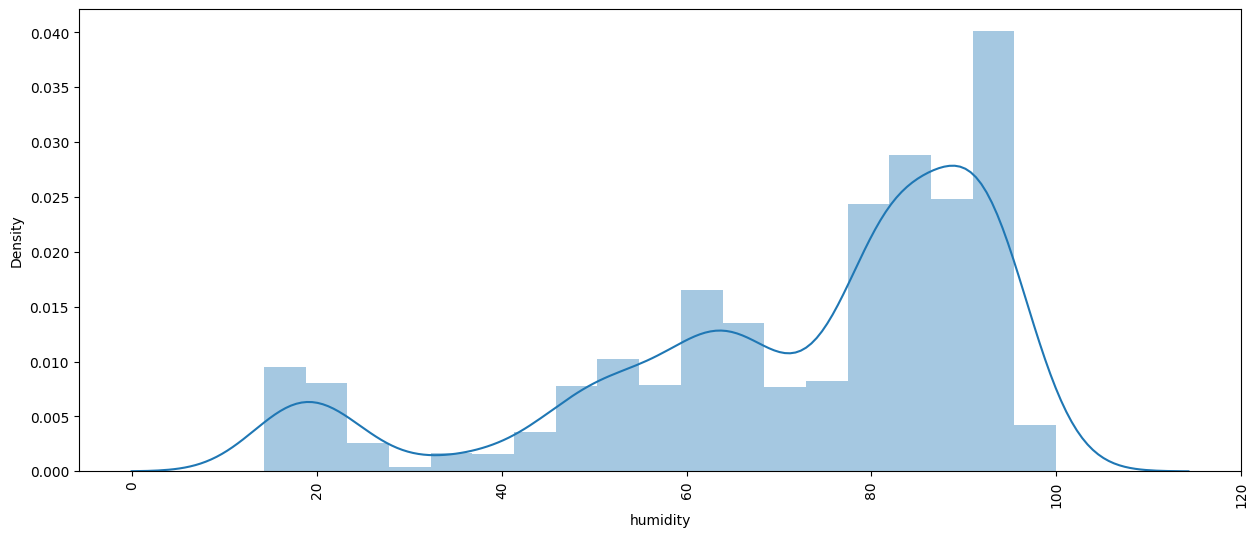

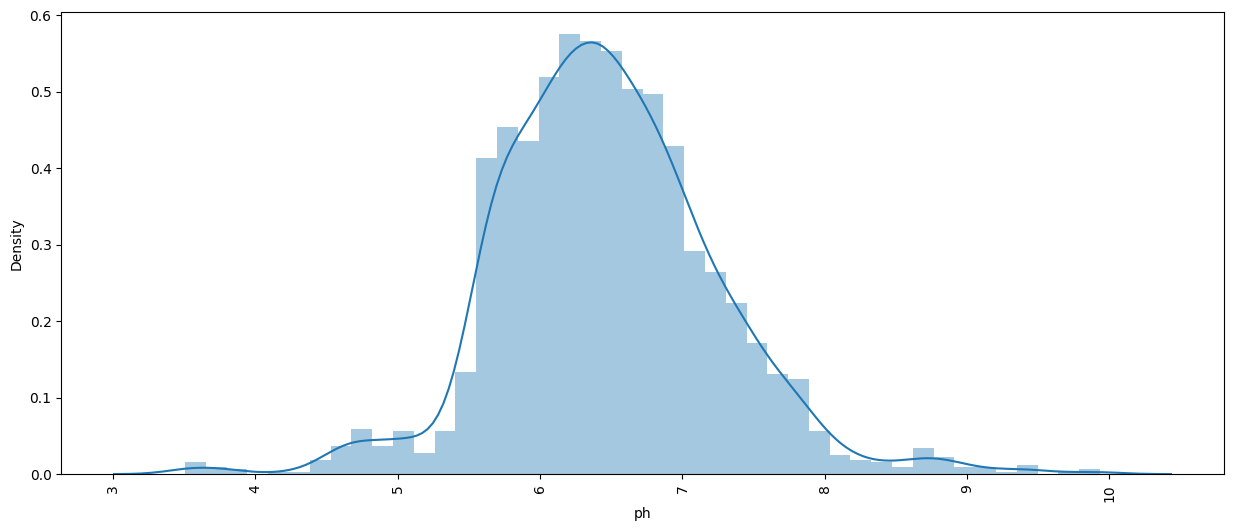

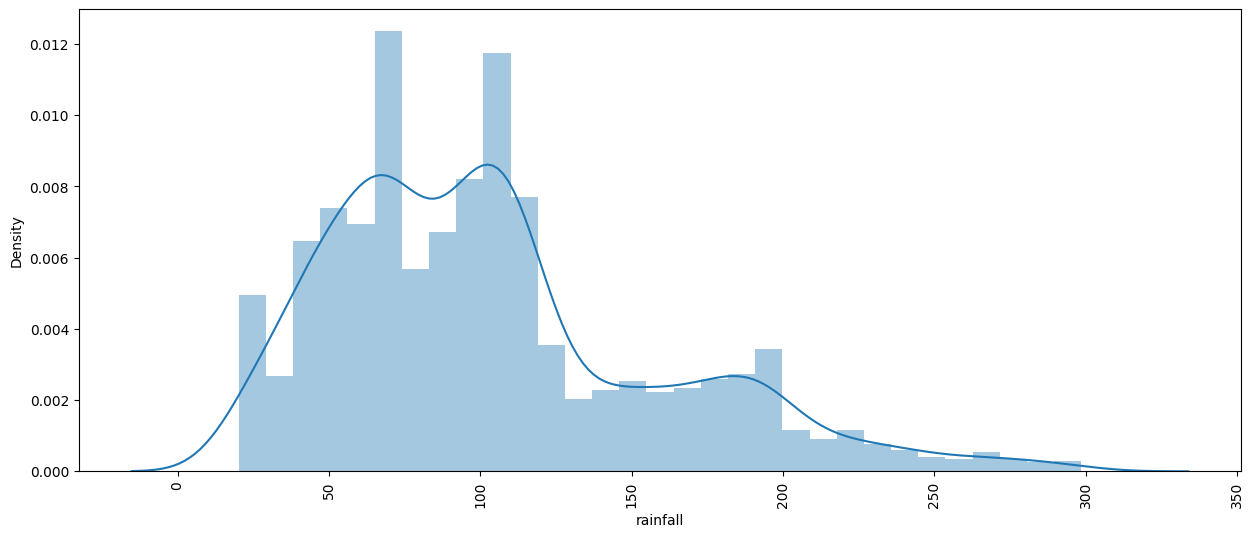

In [14]:
data = df[['N','P','K','temperature','humidity','ph','rainfall']]
for i in data.columns:
    plt.figure(figsize = (15,6))
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    plt.show()


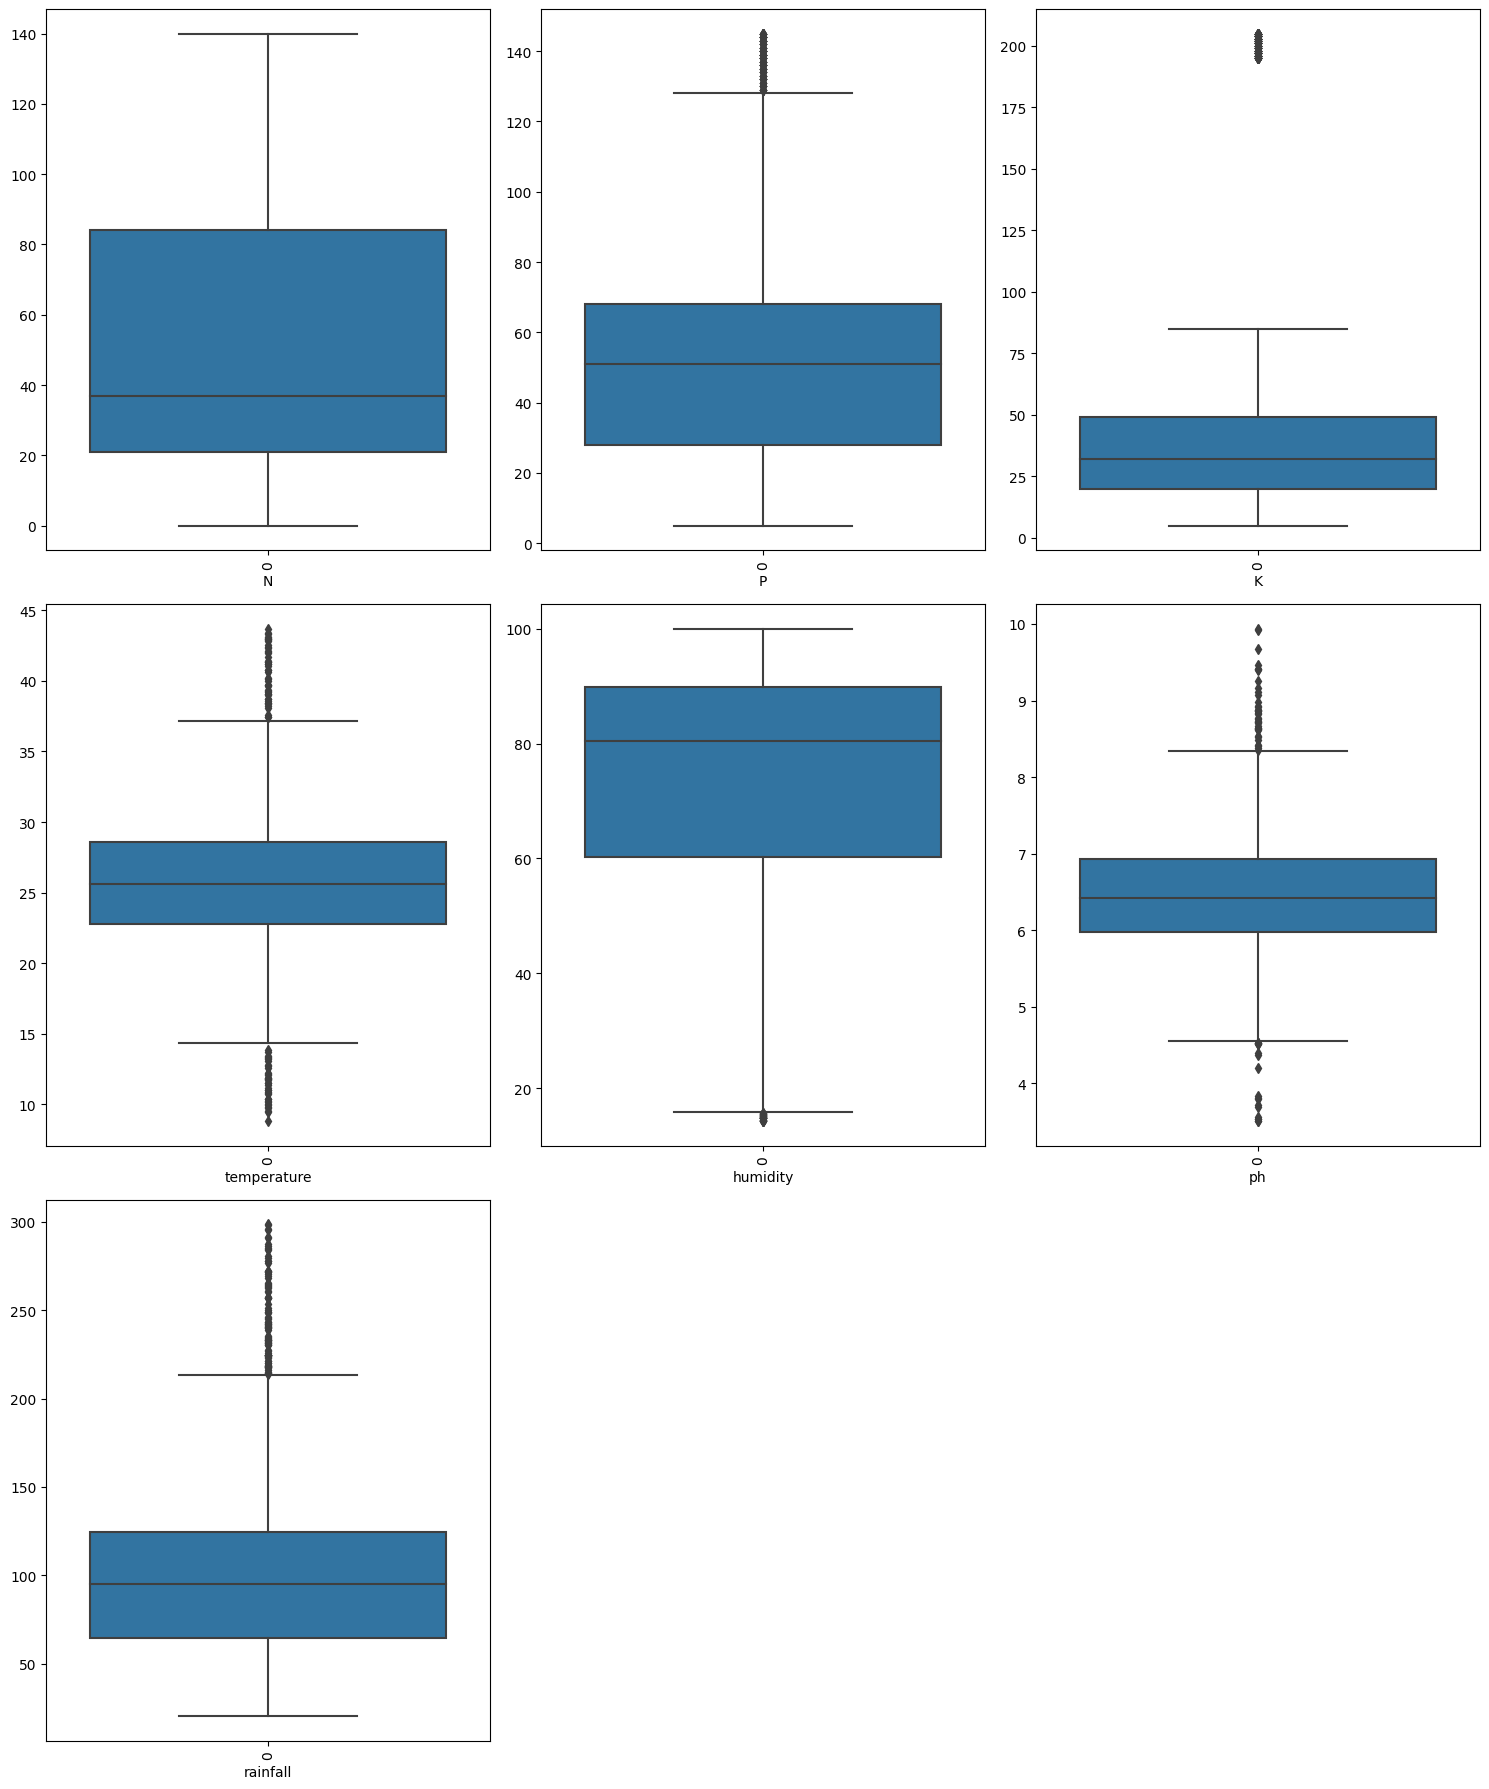

In [15]:

# Select the desired columns
data = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Determine the number of columns and rows for subplots
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3

# Create subplots with two lines
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 6*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Iterate over columns and create box plots
for i, col in enumerate(data.columns):
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Remove any unused subplots
if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


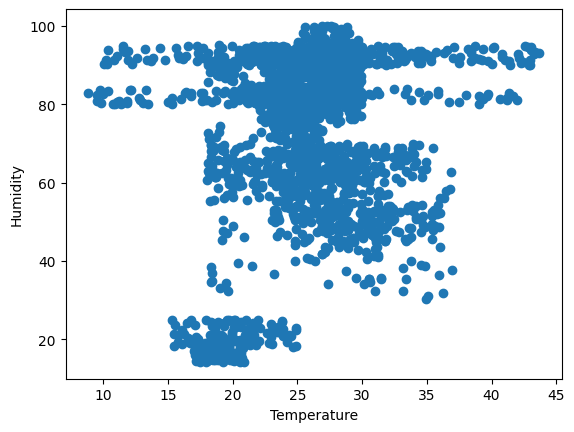

In [16]:
# Scatter Plot
plt.scatter(df['temperature'], df['humidity'])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()


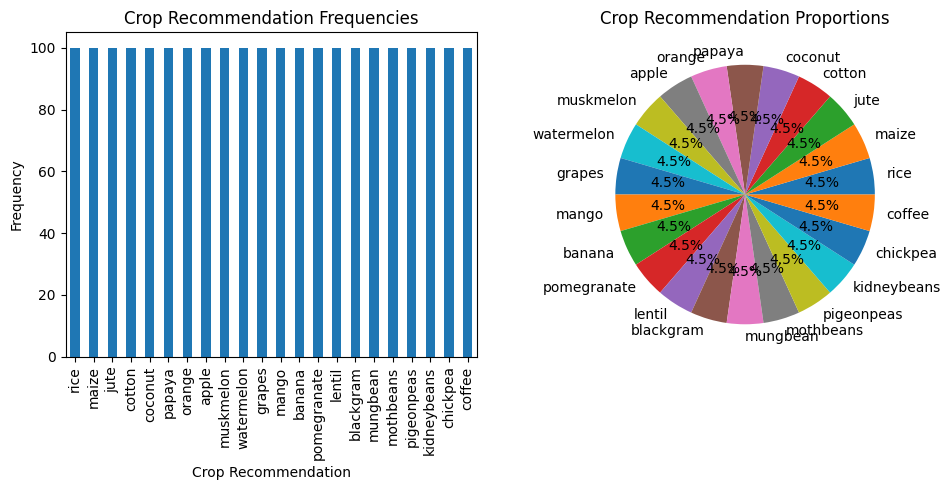

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
crop_freq = df['label'].value_counts()
# Bar Plot
df['label'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Crop Recommendation')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Crop Recommendation Frequencies')

# Pie Chart
axes[1].pie(crop_freq, labels=crop_freq.index, autopct='%1.1f%%')
axes[1].set_ylabel('')
axes[1].set_title('Crop Recommendation Proportions')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()







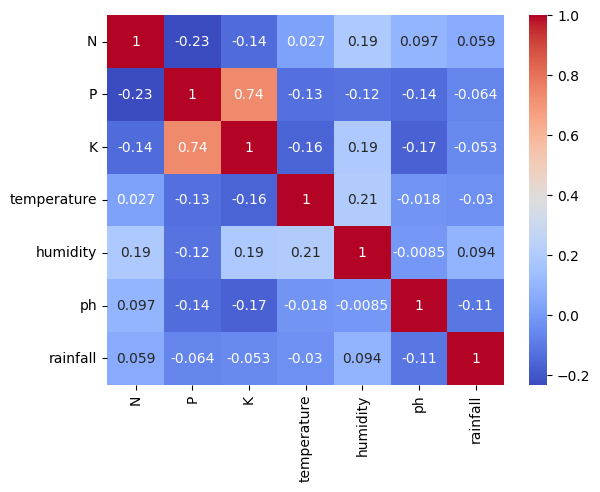

In [18]:
# Heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

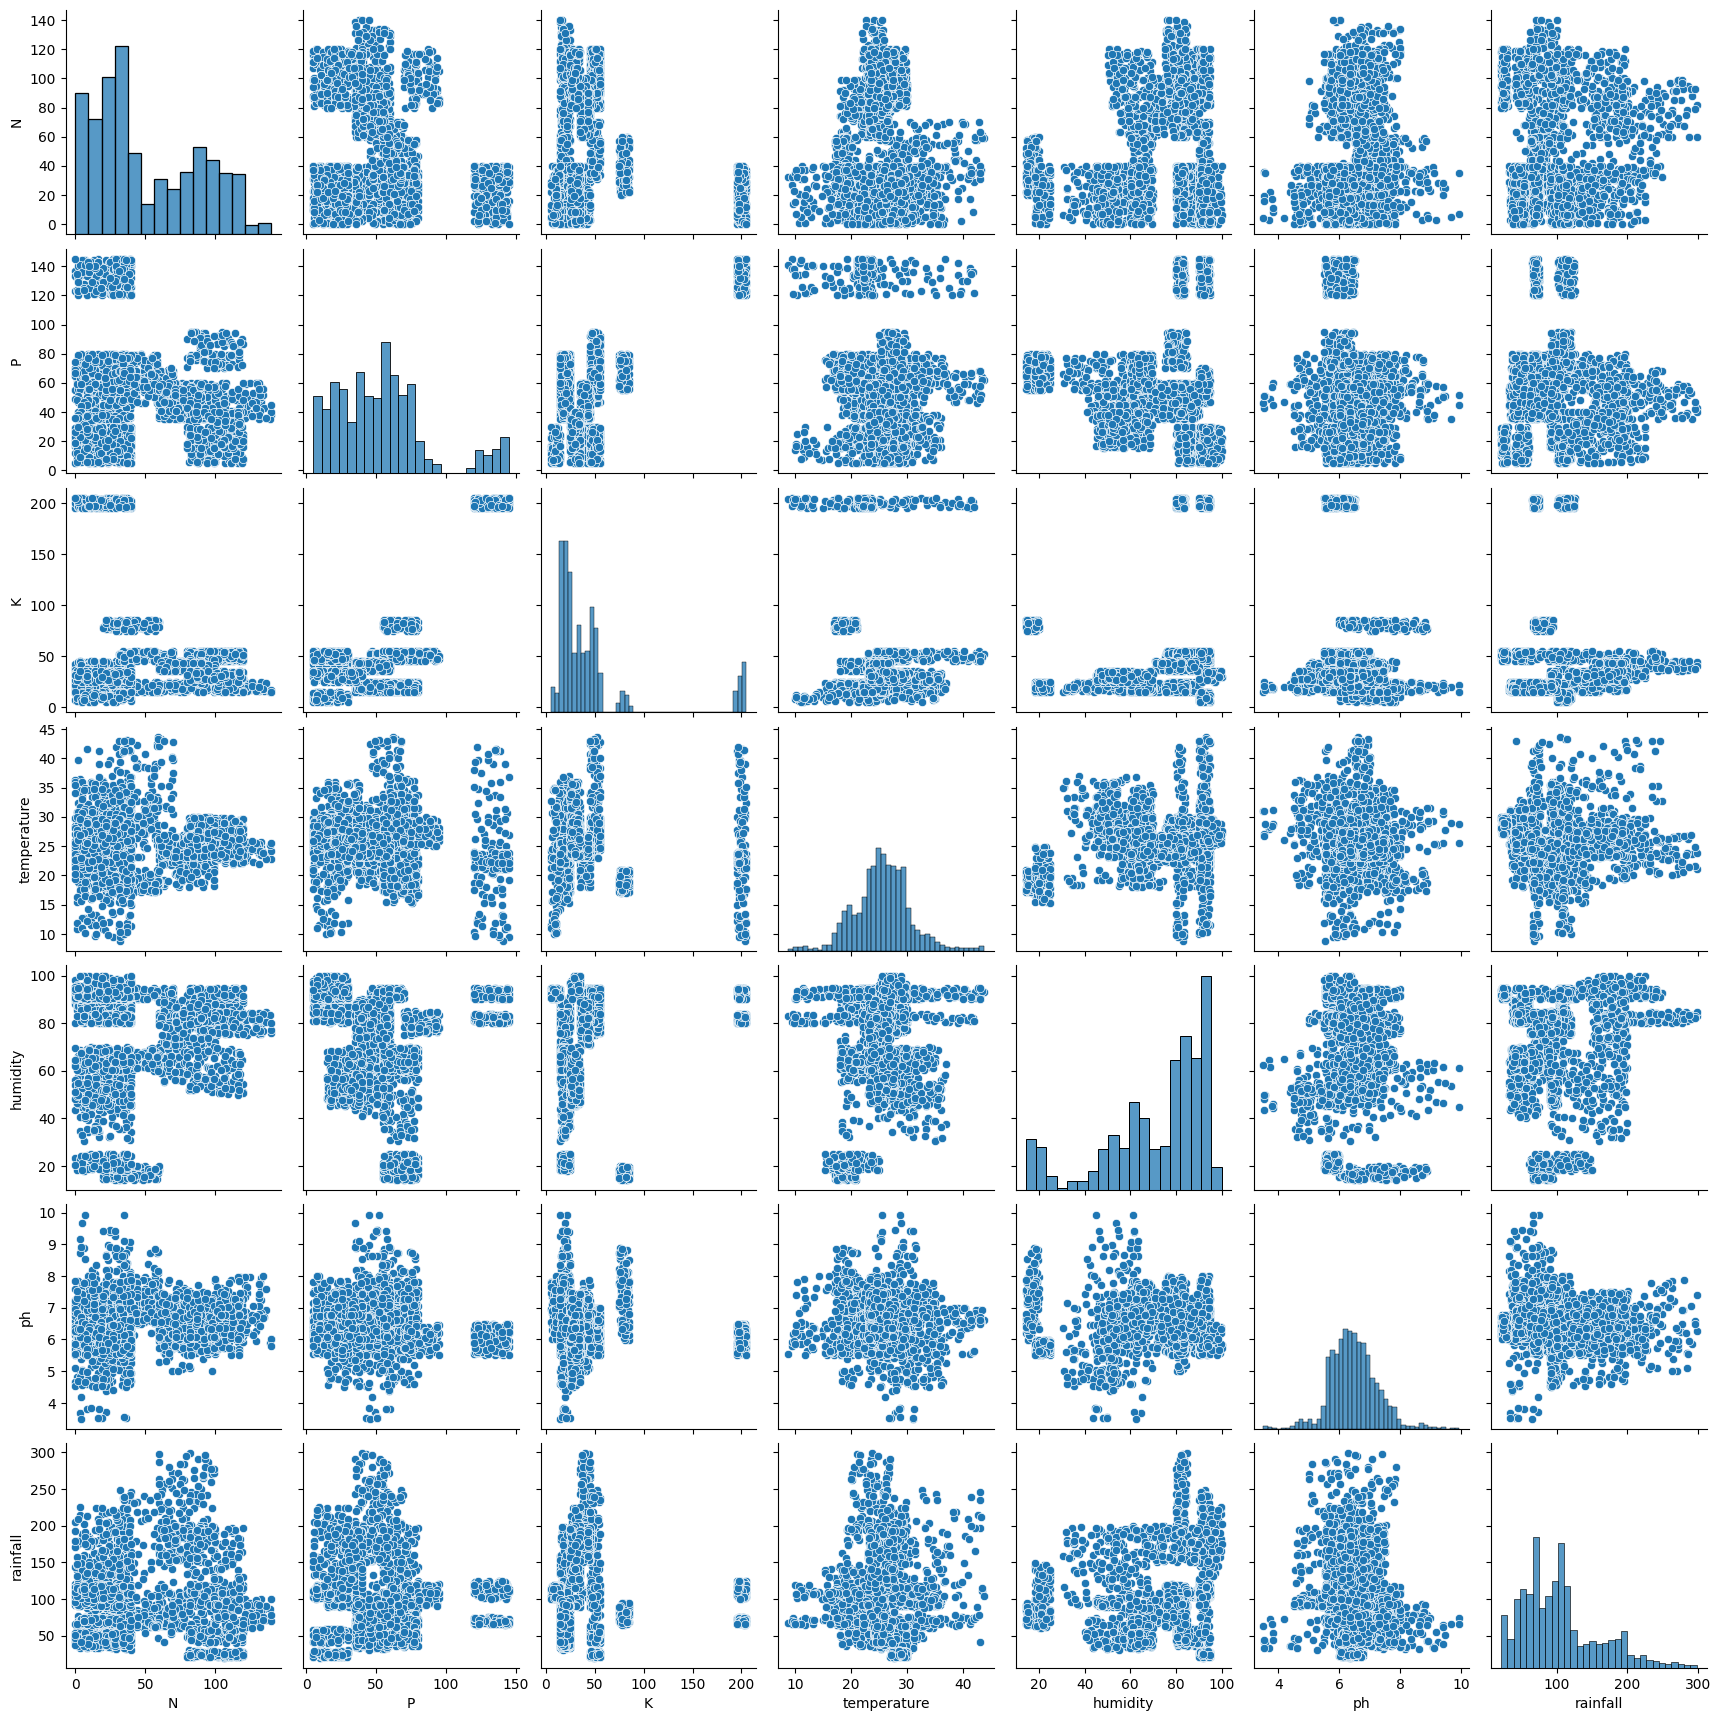

In [19]:
sns.pairplot(df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.show()

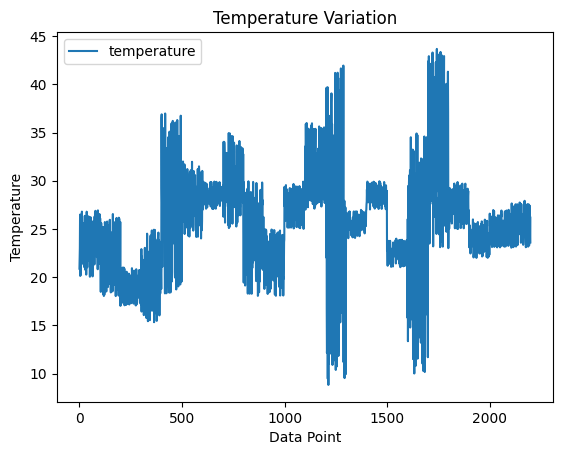

In [20]:
df.plot(y='temperature')
plt.xlabel('Data Point')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

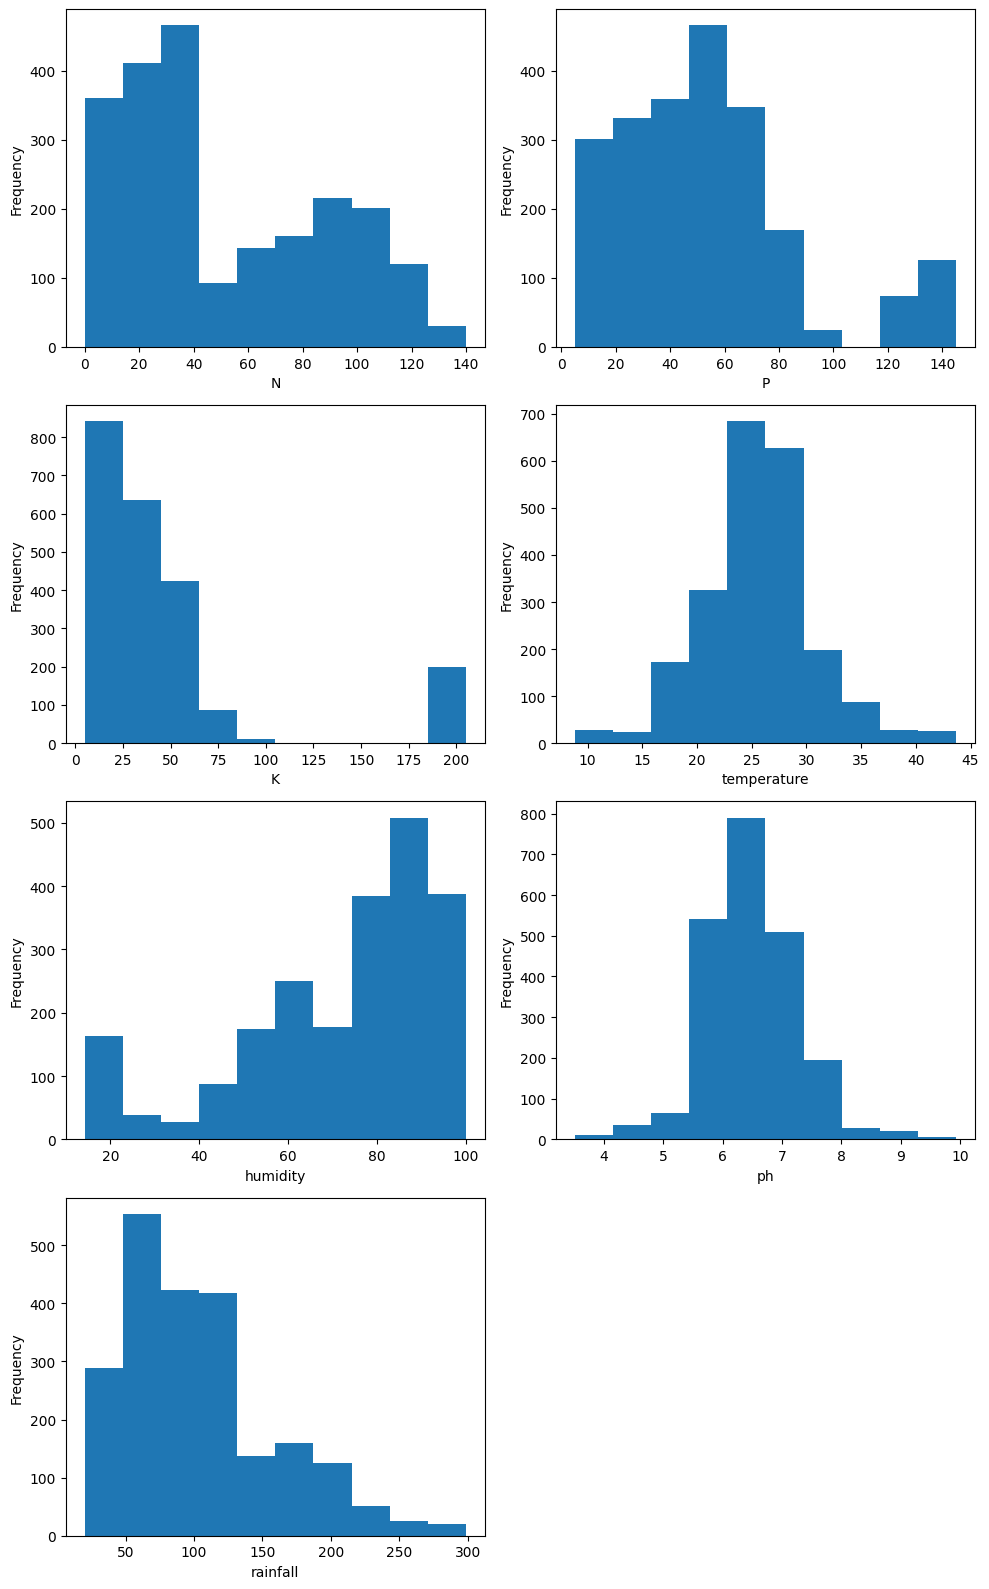

In [21]:

# Assuming you have your dataset loaded into a pandas DataFrame called 'df'
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

num_plots = len(num_cols)
num_rows = (num_plots + 1) // 2

# Create subplots with the required number of rows and columns
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 4*num_rows))

# Flatten the axes array
axes = axes.flatten()

# Iterate over numerical columns and create histograms
for i, col in enumerate(num_cols):
    axes[i].hist(df[col])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
if num_plots < len(axes):
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [22]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')

In [23]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [24]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new.head()

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


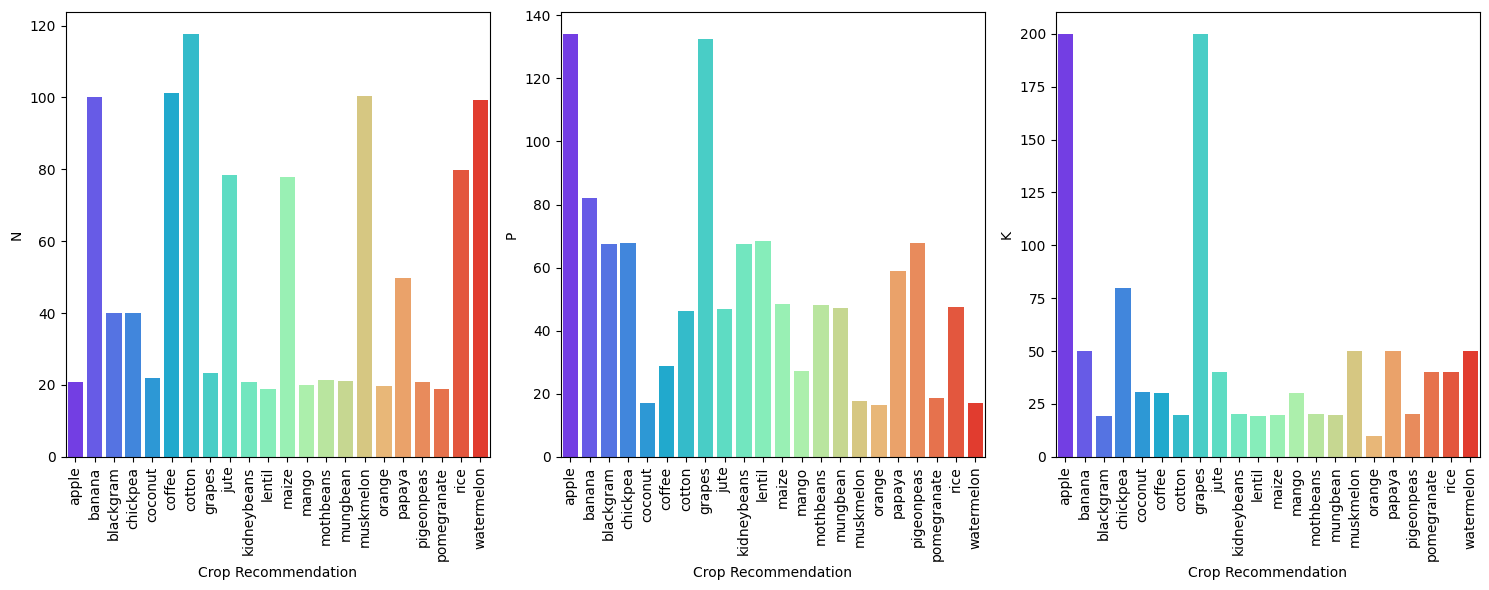

In [25]:
plt.figure(figsize=(15, 6))

# Plot for column 'N'
plt.subplot(1, 3, 1)
sns.barplot(x='label', y='N', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('N')

# Plot for column 'P'
plt.subplot(1, 3, 2)
sns.barplot(x='label', y='P', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('P')

# Plot for column 'K'
plt.subplot(1, 3, 3)
sns.barplot(x='label', y='K', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('K')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()









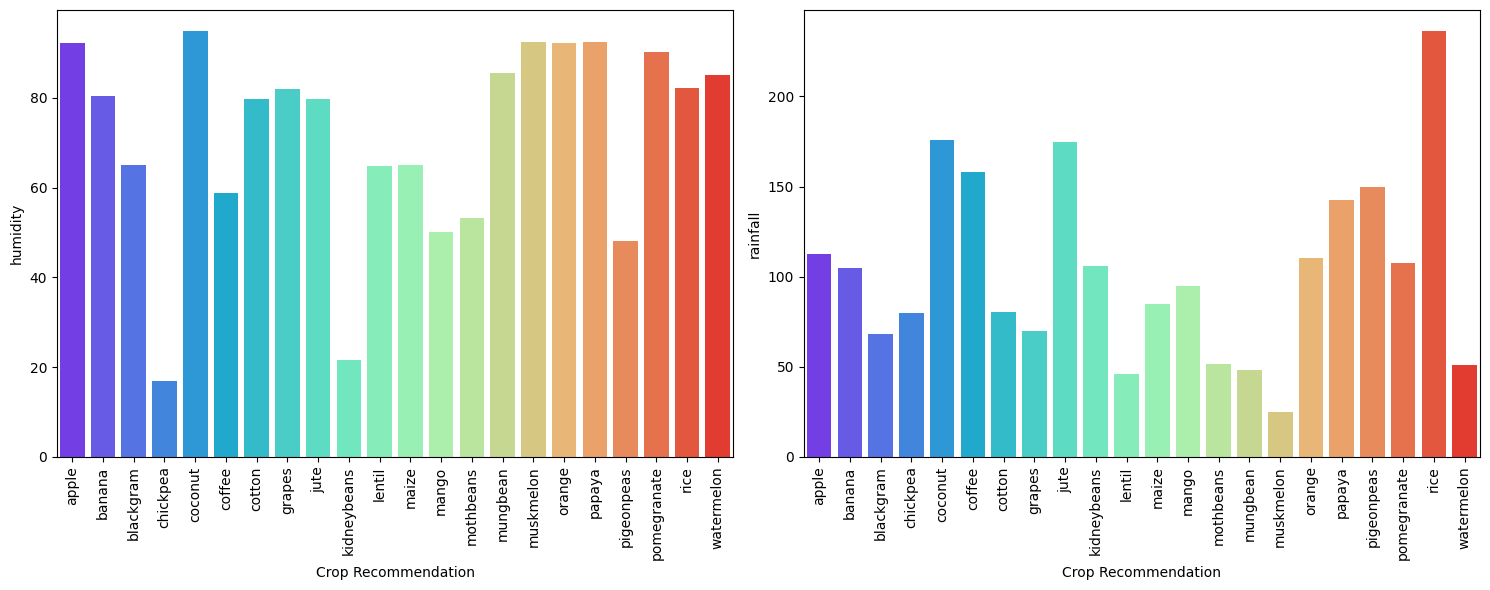

In [26]:
plt.figure(figsize=(15, 6))

# Plot for column 'N'
plt.subplot(1, 2, 1)
sns.barplot(x='label', y='humidity', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('humidity')

# Plot for column 'P'
plt.subplot(1, 2, 2)
sns.barplot(x='label', y='rainfall', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('rainfall')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



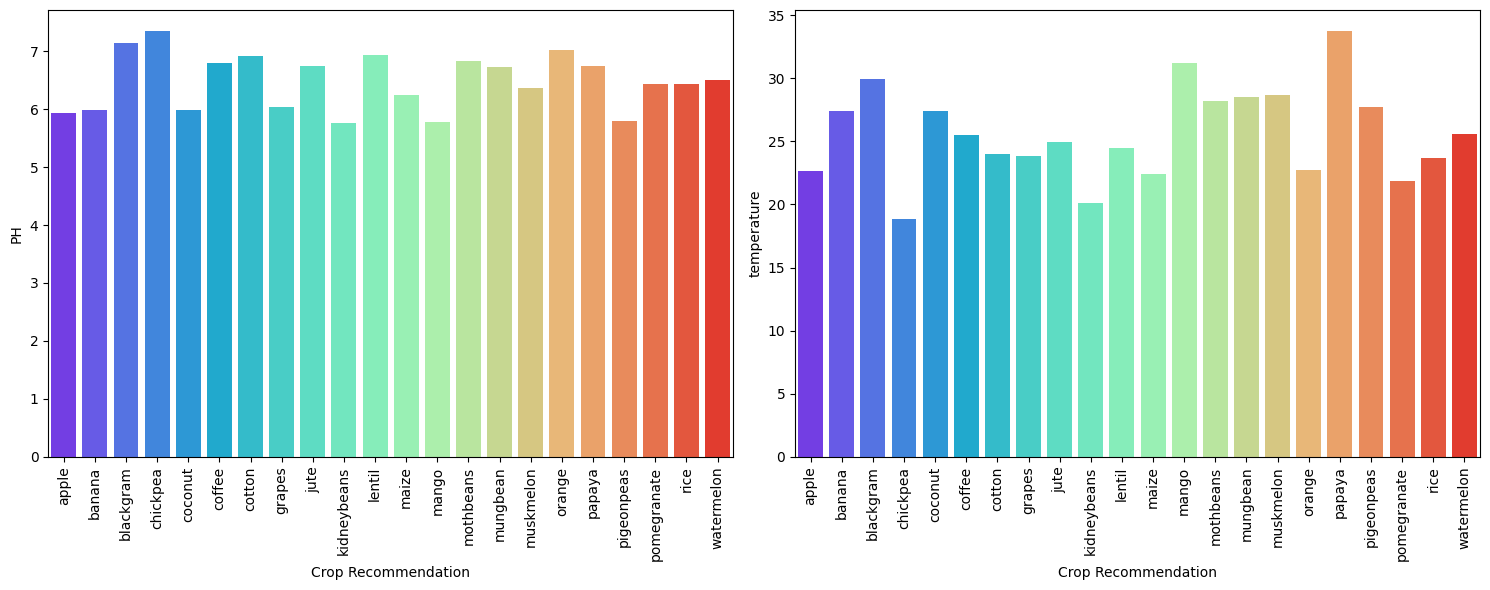

In [27]:
plt.figure(figsize=(15, 6))

# Plot for column 'N'
plt.subplot(1, 2, 1)
sns.barplot(x='label', y='ph', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('PH')

# Plot for column 'P'
plt.subplot(1, 2, 2)
sns.barplot(x='label', y='temperature', data=crop_summary_new, palette='rainbow')
plt.xticks(rotation=90)
plt.xlabel('Crop Recommendation')
plt.ylabel('temperature')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()



## **Model Training**

In [28]:
features = df[['N','P','K','temperature','humidity','ph','rainfall']]
target = df['label']

In [29]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []


#### **Splitting the data**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)


#### **Decision Tree**

In [31]:
from sklearn.tree import DecisionTreeClassifier




In [32]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))


predictions = DecisionTree.predict(features)
accuracy = metrics.accuracy_score(target, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Decision Tree's accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [33]:
from sklearn.model_selection import cross_val_score




In [34]:
score = cross_val_score(DecisionTree,features,target,cv = 5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())

Cross-Validation Scores: [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Average Accuracy: 0.9140909090909091


#### **RANDOM FOREST**

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
RandomForest = RandomForestClassifier(random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and predict on the test set
best_model = grid_search.best_estimator_
predicted = best_model.predict(X_test)

# Calculate accuracy and append to list
accuracy = metrics.accuracy_score(y_test, predicted)
acc.append(accuracy)
model.append('Random Forest')
print("Random Forest Accuracy:", accuracy * 100)

# Print classification report
print(classification_report(y_test, predicted))


predictions = best_model.predict(features)
accuracy = metrics.accuracy_score(target, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Random Forest Accuracy: 99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [37]:
score = cross_val_score(RandomForest,features,target,cv = 5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())

Cross-Validation Scores: [0.99772727 0.99090909 0.99772727 0.99545455 0.98636364]
Average Accuracy: 0.9936363636363638


#### **Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression


In [39]:
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

predictions = LogReg.predict(features)
accuracy = metrics.accuracy_score(target, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")


Logistic Regression Accuracy is 95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.

In [40]:
score = cross_val_score(LogReg,features,target,cv = 5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())

Cross-Validation Scores: [0.95       0.96590909 0.94772727 0.96590909 0.94318182]
Average Accuracy: 0.9545454545454545


#### **Naive Bayes(Gaussian)**

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))


predictions = Naive_Bayes.predict(features)
accuracy = metrics.accuracy_score(target, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}%")

Naive Bayes accuracy is 95.22727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      

In [43]:
score = cross_val_score(Naive_Bayes,features,target,cv = 5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())

Cross-Validation Scores: [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Average Accuracy: 0.9950000000000001


#### **Support vector Machines(SVM)**

In [44]:
from sklearn.svm import SVC

In [45]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM model with hyperparameter tuning
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['rbf']}
svm_model = SVC()
grid_search = GridSearchCV(svm_model, parameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_svm_model = grid_search.best_estimator_

# Predict and evaluate
predicted = best_svm_model.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, predicted)
acc.append(accuracy)
model.append('SVM')

print('Best SVM accuracy score is:', accuracy * 100)
print(classification_report(y_test, predicted))

Best SVM accuracy score is: 98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [46]:
score = cross_val_score(best_svm_model,features,target,cv = 5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())

Cross-Validation Scores: [0.08636364 0.08636364 0.10227273 0.08409091 0.07045455]
Average Accuracy: 0.08590909090909091


### **XGBoost**

In [47]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# XGBoost model
XB = XGBClassifier()
XB.fit(X_train, y_train_encoded)

predicted_values = XB.predict(X_test)

x = metrics.accuracy_score(y_test_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

# Decoding predicted values
predicted_labels = label_encoder.inverse_transform(predicted_values)

print(classification_report(y_test, predicted_labels))



XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

In [48]:
# Cross-validation
score = cross_val_score(XB, features, target_encoded, cv=5)
print("Cross-Validation Scores:", score)
print("Average Accuracy:", score.mean())


Cross-Validation Scores: [0.99318182 0.99318182 0.99318182 0.99090909 0.99090909]
Average Accuracy: 0.9922727272727274


#### **Comparision of models**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

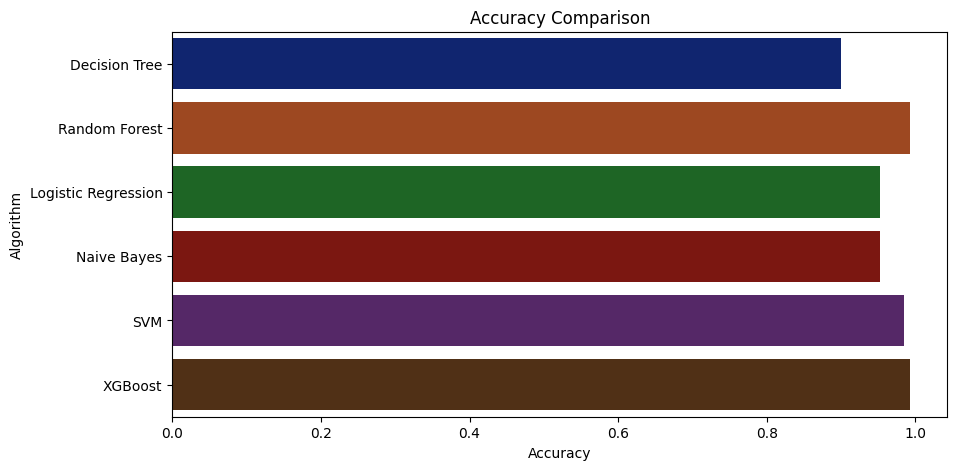

In [49]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')